In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import json

import matplotlib.pyplot as plt
import pandas as pd
from rdkit import RDLogger
from pandarallel import pandarallel

import massspecgym.utils as utils

In [3]:
# Suppress RDKit warnings and errors
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

pandarallel.initialize(nb_workers=6, progress_bar=True)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [11]:
with open(utils.hugging_face_download('molecules/MassSpecGym_retrieval_candidates_mass.json')) as f:
    cands_mass = json.load(f)
cands_mass = pd.DataFrame({'smiles': cands_mass.keys(), 'cands': cands_mass.values()})

with open(utils.hugging_face_download('molecules/MassSpecGym_retrieval_candidates_formula.json')) as f:
    cands_formula = json.load(f)
cands_formula = pd.DataFrame({'smiles': cands_formula.keys(), 'cands': cands_formula.values()})

# with open('./MassSpecGym_retrieval_candidates_mass.json') as f:
#     cands_mass = json.load(f)
# cands_mass = pd.DataFrame({'smiles': cands_mass.keys(), 'cands': cands_mass.values()})

# with open('./MassSpecGym_retrieval_candidates_formula.json') as f:
#     cands_formula = json.load(f)
# cands_formula = pd.DataFrame({'smiles': cands_formula.keys(), 'cands': cands_formula.values()})

(…)ssSpecGym_retrieval_candidates_mass.json:   0%|          | 0.00/455M [00:00<?, ?B/s]

## Number of candidates

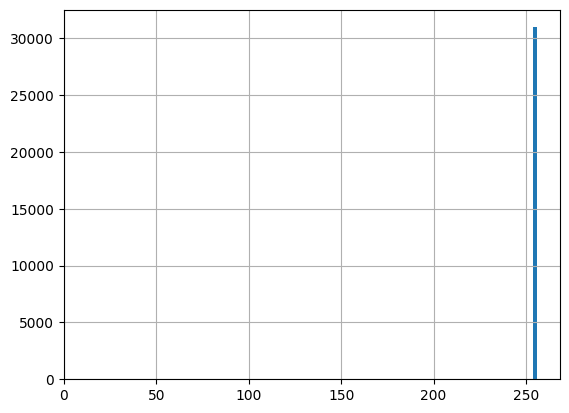

n_cands
256    30948
115       14
243       13
157       13
230       11
       ...  
12         1
31         1
60         1
66         1
30         1
Name: count, Length: 225, dtype: int64

In [9]:
cands_mass['n_cands'] = cands_mass['cands'].apply(len)
cands_mass['n_cands'].hist(bins=100)
plt.show()
cands_mass['n_cands'].value_counts()

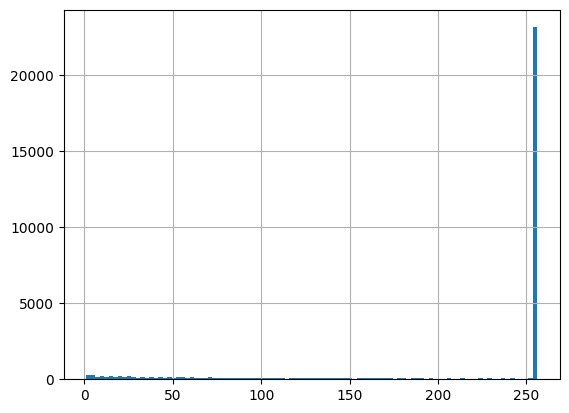

n_cands
256    23137
1        128
5        104
4        103
7         93
       ...  
175       12
200       12
247       12
232       11
255        8
Name: count, Length: 256, dtype: int64

In [10]:
cands_formula['n_cands'] = cands_formula['cands'].apply(len)
cands_formula['n_cands'].hist(bins=100)
plt.show()
cands_formula['n_cands'].value_counts()

## Number of positive samples among candidates

In [5]:
def n_pos(row):
    inchi_true = utils.smiles_to_inchi_key(row['smiles'])
    return sum(utils.smiles_to_inchi_key(c) == inchi_true for c in row['cands'])

cands_mass['n_pos'] = cands_mass.parallel_apply(n_pos, axis=1)
cands_mass['n_pos'].value_counts()

n_pos
1    32010
Name: count, dtype: int64

In [6]:
def n_pos(row):
    inchi_true = utils.smiles_to_inchi_key(row['smiles'])
    return sum(utils.smiles_to_inchi_key(c) == inchi_true for c in row['cands'])

cands_formula['n_pos'] = cands_formula.parallel_apply(n_pos, axis=1)
cands_formula['n_pos'].value_counts()

n_pos
1    32010
Name: count, dtype: int64

## Analyze InChiKeys of queries

In [10]:
len(cands_mass['smiles']), cands_mass['smiles'].apply(utils.smiles_to_inchi_key).nunique()

(32010, 29294)